# Holography Demo

A few basic demonstrations to introduce the RF holography framework.
Prepared by aph@sarao.ac.za using data from the SKA-MID prototype Dish, SDQM aka SKA-MPI.


                                                      As on 17/06/2024

In [1]:
%pylab inline
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import dvsholog as katholog
from dvs import hologreport
from analysis import katselib

# Usually kat-flap is contacted first for sensor data; it is offline for June 2024, so prevent timeouts
for k in katselib.SENSOR_PORTALS.keys():
    if ("kat-flap" in k):
        katselib.SENSOR_PORTALS[k] = np.inf

/home/aph/work/dvs/libraries/analysis/katsemodels.py:1156: RuntimeWarning: divide by zero encountered in divide
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.
/home/aph/work/dvs/libraries/analysis/katsemodels.py:1156: RuntimeWarning: invalid value encountered in multiply
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.


## Notes on Convergence
1. For devmaps & offsets, use >=20deg in B1 & >=12deg in B2 & >=1.3deg in Ku-band.
2. Use gridsize=512 for all.


## xyzoffsets & other parameters
1. For SKA Dish, all PREDICTED patterns are generated rel. to F0 in SKA-TEL-DSH-0000018 rev 2.
2. Measured patterns are referenced to center of aperture (point Q0 in above).

In [3]:
F_mr, f_eq = 5.8518, 8.507 # From SKA-TEL-DSH-0000018 rev 2

# PREDICTED patterns generated rel. to secondary focus (F0 in SKA-TEL-DSH-0000018 rev 2), shift to center on Q0
pDISHPARAMS = dict(telescope="SKA", xyzoffsets=[0.0, 1.476396+8.04, 0], xmag=-f_eq/F_mr, focallength=F_mr)

# Parameters for MEASURED patterns
# katholog x=cross-elevation=no offset,
#          y=elevation direction=el_axis_to_centre_on_main_reflector,
#          z=beam direction = az_axis_to_centre_on_main_reflector (from 316-000000-022 rev 1)
DISHPARAMS = dict(telescope="SKA", xyzoffsets=[0.0, 1.49, -3.52], xmag=-f_eq/F_mr, focallength=F_mr)

# Demonstrate PREDICTED Patterns
Show that all patterns are properly centered in aperture plane, and "up" appears up.

In [4]:
def demo_plots(amH, amV):
    """ Just some simple aperture plane plots from H & V maps. """
    axs = subplots(2,3, figsize=(14,8))[1]
    for ax,am in zip(axs, (amH,amV)):
        plt.sca(ax[0]); am.plot("amp", doclf=False)
        plt.sca(ax[1]); am.plot("dev", doclf=False) # CAUTION: this includes deviation from feed phase
        plt.sca(ax[2]); plt.title("... without the cookie cutter")
        npdm = katholog.utilities.getdeviation(am.nopointingphasemap,am.mapsize,am.gridsize,am.wavelength,am.focallength,am.parabolaoffsetdev)
        clim = ax[1]._children[0].get_clim()
        plt.imshow(npdm, clim=clim, cmap=am.colmap, extent=[i*am.mapsize/2.0 for i in [-1,1,-1,1]], origin='lower'); plt.colorbar()


Find sampling 0.065280[deg], extent 29.851618[deg]
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 6.6s
flatmode=pointingonly
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 6.7s
flatmode=pointingonly


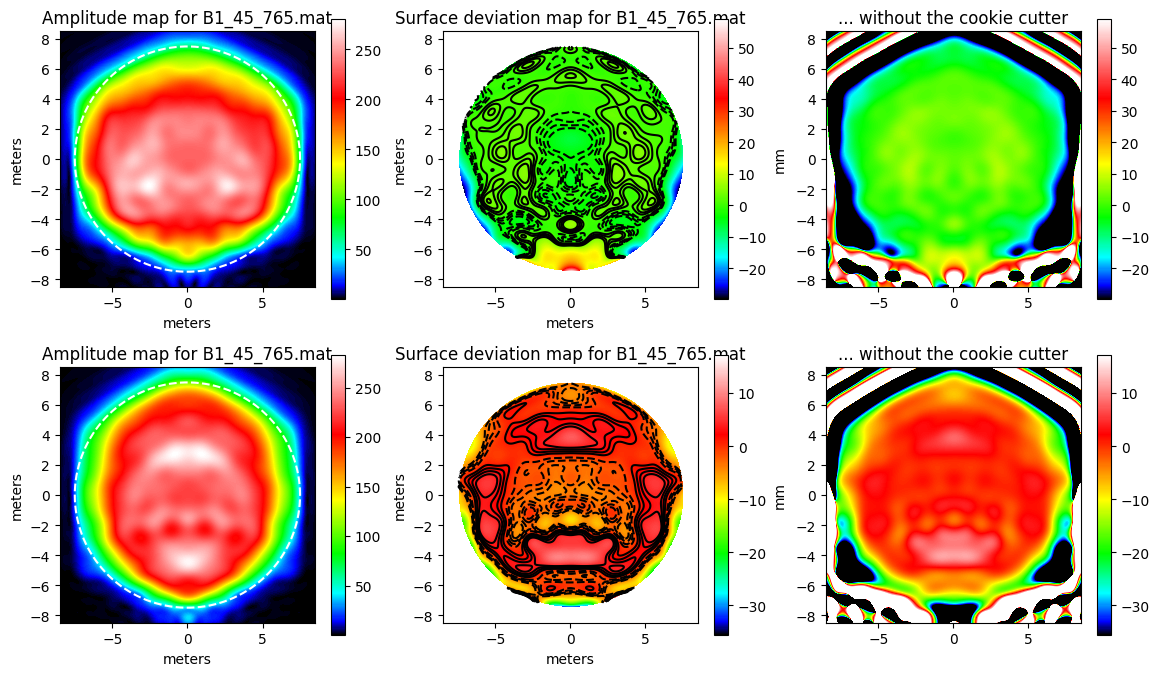

In [5]:
# B1, approximately center of band
b, amH, amV = hologreport.load_predicted(765, None, pDISHPARAMS, el_deg=45, band="B1", clipextent=30, gridsize=512)

demo_plots(amH, amV)

Find sampling 0.025816[deg], extent 11.978080[deg]
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 4.1s
flatmode=pointingonly
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 4.1s
flatmode=pointingonly


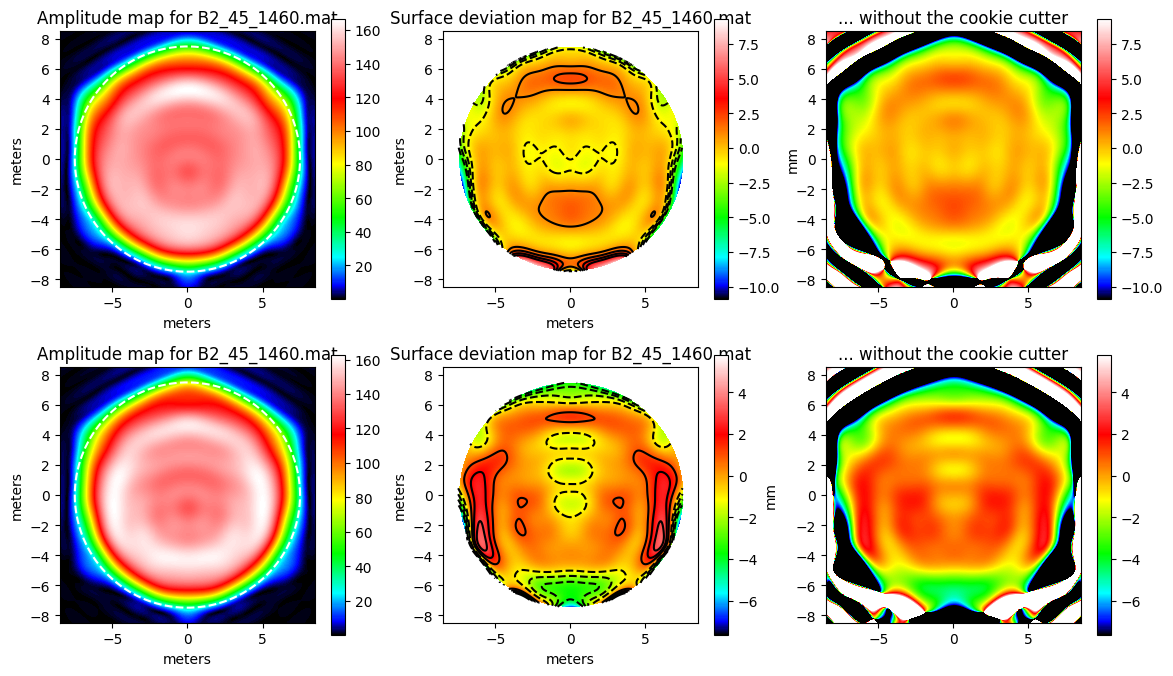

In [6]:
# B2, approximately center of band
b, amH, amV = hologreport.load_predicted(1460, None, pDISHPARAMS, el_deg=45, band="B2", clipextent=12, gridsize=512)

demo_plots(amH, amV)

Find sampling 0.004355[deg], extent 1.999898[deg]
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 18.0s
flatmode=pointingonly
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 17.8s
flatmode=pointingonly


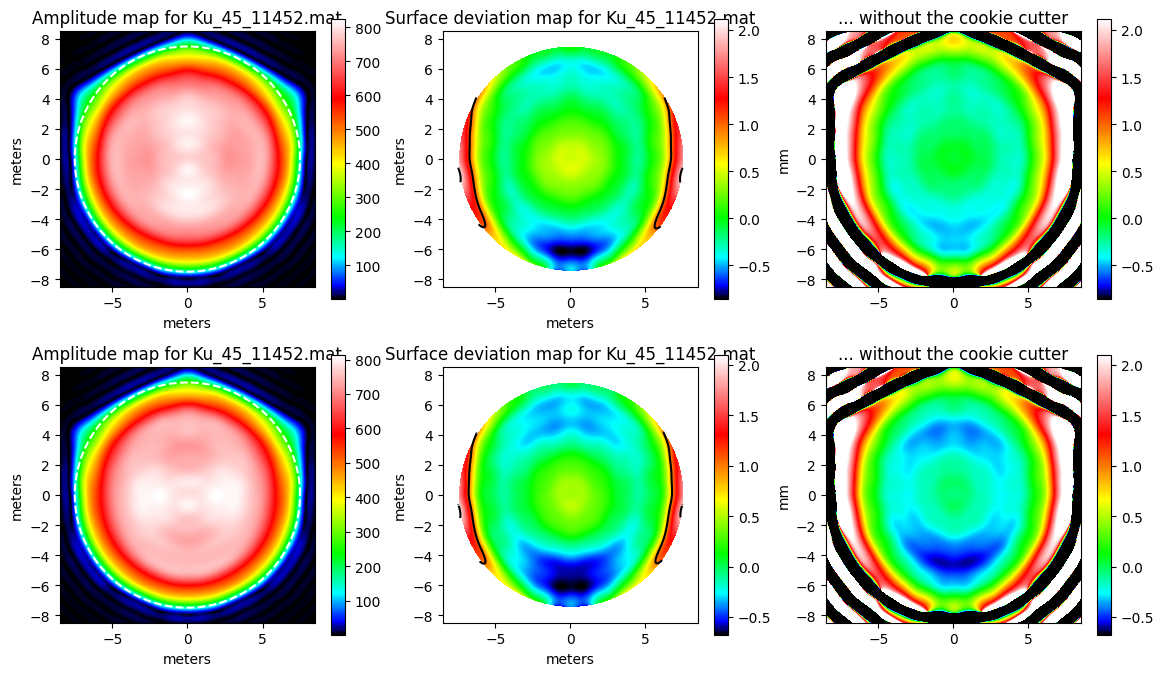

In [7]:
# Ku-band
b, amH, amV = hologreport.load_predicted(11452, None, pDISHPARAMS, el_deg=45, band="Ku", clipextent=2, gridsize=512)

demo_plots(amH, amV)

In [23]:
# "eff0" are calculated from the measured patterns "as-is"
(amH.eff0_spillover, # NOT accurately constrained from far field patterns
 amH.eff0_taper,
 amH.eff0_phase,
 amH.eff0_illumination, # Here, illumination = taper*phase so need to multiply with spillover to get the "aperture illumination"
 amH.eff0_illumination*amH.eff0_spillover)

(0.9954056647099446,
 0.918807268386101,
 0.963726688898286,
 0.885479086497416,
 0.881410898681715)

In [24]:
# "eff" are calculated after adjusting the measured pattern to compensate for the modeled collimation errors
(amH.eff_spillover, # NOT accurately constrained from far field patterns
 amH.eff_taper,
 amH.eff_phase,
 amH.eff_illumination, # Here, illumination = taper*phase so need to multiply with spillover to get the "aperture illumination"
 amH.eff_illumination*amH.eff_spillover)

(0.9954056647099446,
 0.9188072683861016,
 0.9795612623889662,
 0.9000280077124473,
 0.8958929772745757)

# Standard Reports for Measured Datasets

For demonstration purposes just Ku @ 11452MHz, circular pol.

## All Relevant Predicted Patterns

In [8]:
pred = hologreport.ResultSet("predicted", f_MHz=[11452], beacon_pol=["RCP"], clipextent=1.8)

for f,pol in zip(pred.f_MHz,pred.beacon_pol):
    b, aH, aV = hologreport.load_predicted(f, pol, pDISHPARAMS, el_deg=45, clipextent=pred.clipextent, gridsize=512)
    pred.beams.append(b); pred.apmapsH.append(aH); pred.apmapsV.append(aV)

Find sampling 0.003919[deg], extent 1.799926[deg]
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 15.1s
flatmode=pointingonly
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 15.3s
flatmode=pointingonly


## Measured Datasets from 2021

Note the following work-arounds which are used in this demo.

**WA1: When using flag_slew=True**

A known issue for DVS with SKA Dishes relates to the [COMMAND_TIME_OFFSET](https://github.com/ska-sa/katproxy/blob/release/karoocamv29/katproxy/proxy/ska_mpi_dsh_model.py) (explained in the lined code; can also see the offset as [logged here](http://portal.mkat-rts.karoo.kat.ac.za/katgui/sensor-graph/2021-11-01%2012:06:44/2021-11-02%2008:06:44/10,n/s0000_pos_command_time_offset)).
A standard work-around has been developed for this issue - implemented below.


**WA2: 2020 & 2021 Campaigns**

For data from 2020 & 2021 an ad-hoc work-around is implemented for all datasets, for pointing coordinates that appear to be misaligned from visibilities by ~0.1sec (LMC/ACU sample & hold @ 0.2sec?). All of the datasets are either unaffected or improved with this correction - most affected is Ku-band.

In [9]:
# Path to local cache of datasets
filename = lambda fid: f"./demo_data/{fid}/{fid}_sdp_l0.full.rdb"

# WA1: All of the datasets in this campaign were recorded with COMMAND_LEAD_TIME = 10
katholog.dataset.katdal.visdatav4.SENSOR_PROPS['*activity']['time_offset'] = 10

### Load the Measured Data

This particular dataset: the feed is within 1mm of optimal; pointing model not yet updated; Ku-band feed degraded.

In [10]:
ms_RCP = hologreport.ResultSet(1635972687,f_MHz=[11452+.2197],beacon_pol=["RCP"],clipextent=1.8,tags=["night","IS ND"])

b, aH, aV = hologreport.load_data(filename(ms_RCP.fid), ms_RCP.f_MHz, "s0000", DISHPARAMS, clipextent=ms_RCP.clipextent, gridsize=512,
                                  flag_slew=True, timingoffset=0.1) # WA2
ms_RCP.beams.extend(b); ms_RCP.apmapsH.extend(aH); ms_RCP.apmapsV.extend(aV)

Error: ./demo_data/1635972687/1635972687_sdp_l0.full.rdb is not a holography dataset
Trying anyways
Extracting timestamps
Find sampling 0.006249[deg], extent 1.778289[deg]
Flagged 95 timestamps due to slew
Find sampling 0.006249[deg], extent 1.778289[deg]
resolved using 2 channels, 0.2MHz bandwidth instead of 0.1MHz, (11452.3-11452.1)
Number of channels 2 at 11452.219700MHz within 0.210000MHz bandwidth (0.100000MHz)
Independent DIRECT calculation
using 3068 time samples and 2 channels
s0000: m028-s0000 ntime: 3068 load: 0.2 process: 0.0
Fitting done
Extracting data at 0 0 in target field (region radius 0.00011)
Detected 18 on-axis time intervals
DEBUG NOTE Time to load upfront:  0.0810995101928711
number of time samples  18  ROI used:  0.00010906510885749116
GAINRAWABS calculation
using 3068 time samples and 2 channels
s0000: m028-s0000not doing delay
 ntime: 3068 load: 0.1 process: 0.0
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 4.2s
flatmode=pointingonly


Target: INTELSAT NEW DAWN
Processing tags: ['night', 'IS ND']

-------------------- 11452.2MHz
>> 52.2 degEl @ 23.11 hrs [local time]; SNR~[[34.  6.], [34.  6.], [34.  6.], [34.  6.]]
flatmode=pointingonly
flatmode=pointingonly
SKA Feed XYZ_f offsets (feed removed) [mm]
    H-pol [0.10153159 0.56858259 0.59715444] 		V-pol [0.52139249 0.08636531 0.3894447 ]	(FI @ -22.3598 deg)
Aperture plane RMS (feed removed) [mm]:  as-is; re-collimated
              H-pol 0.21; 0.21		V-pol 0.20; 0.20
Reflector phase efficiency (feed removed):  as-is; re-collimated
    11.5 GHz: H-pol 0.989476; 0.989631		V-pol 0.991056; 0.991124
    15.0 GHz: H-pol 0.98203; 0.982297		V-pol 0.984717; 0.984835
    20.0 GHz: H-pol 0.968329; 0.968804		V-pol 0.973031; 0.973243
Error Beam
    H-pol < 5.4[0.3]% (95pct 4.4%, std 1.9%)		V-pol < 5.4[0.3]% (95pct 4.4%, std 1.9%)


/home/aph/venv-py3/lib/python3.8/site-packages/dvsholog/beam.py:1025: RuntimeWarning: divide by zero encountered in log10
  im=plt.imshow(20.0*np.log10(np.abs(Quant[ich,:,:])),extent=extents,cmap=self.colmap,origin='lower',vmin=clim[0],vmax=clim[1])


Report generated <bruce.science.kat.ac.za:/home/aph/work_dvs/dvs/notebooks/ku_hologreport_s0000_1635972687.pdf>


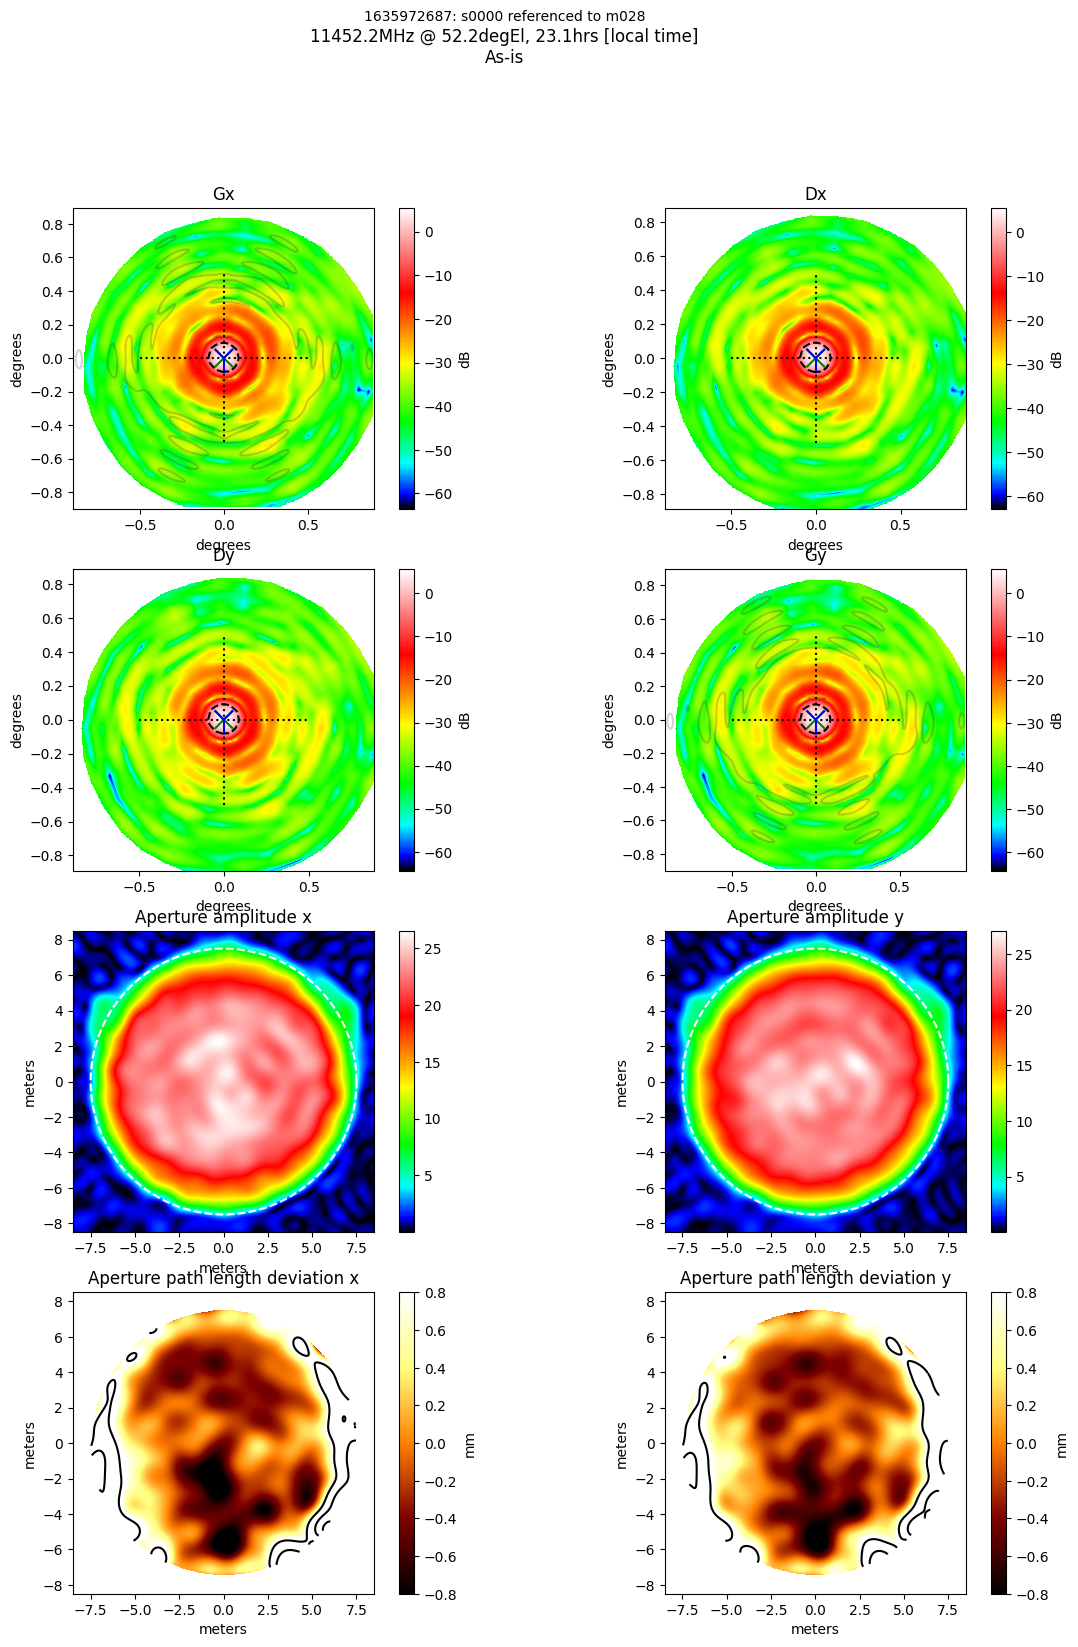

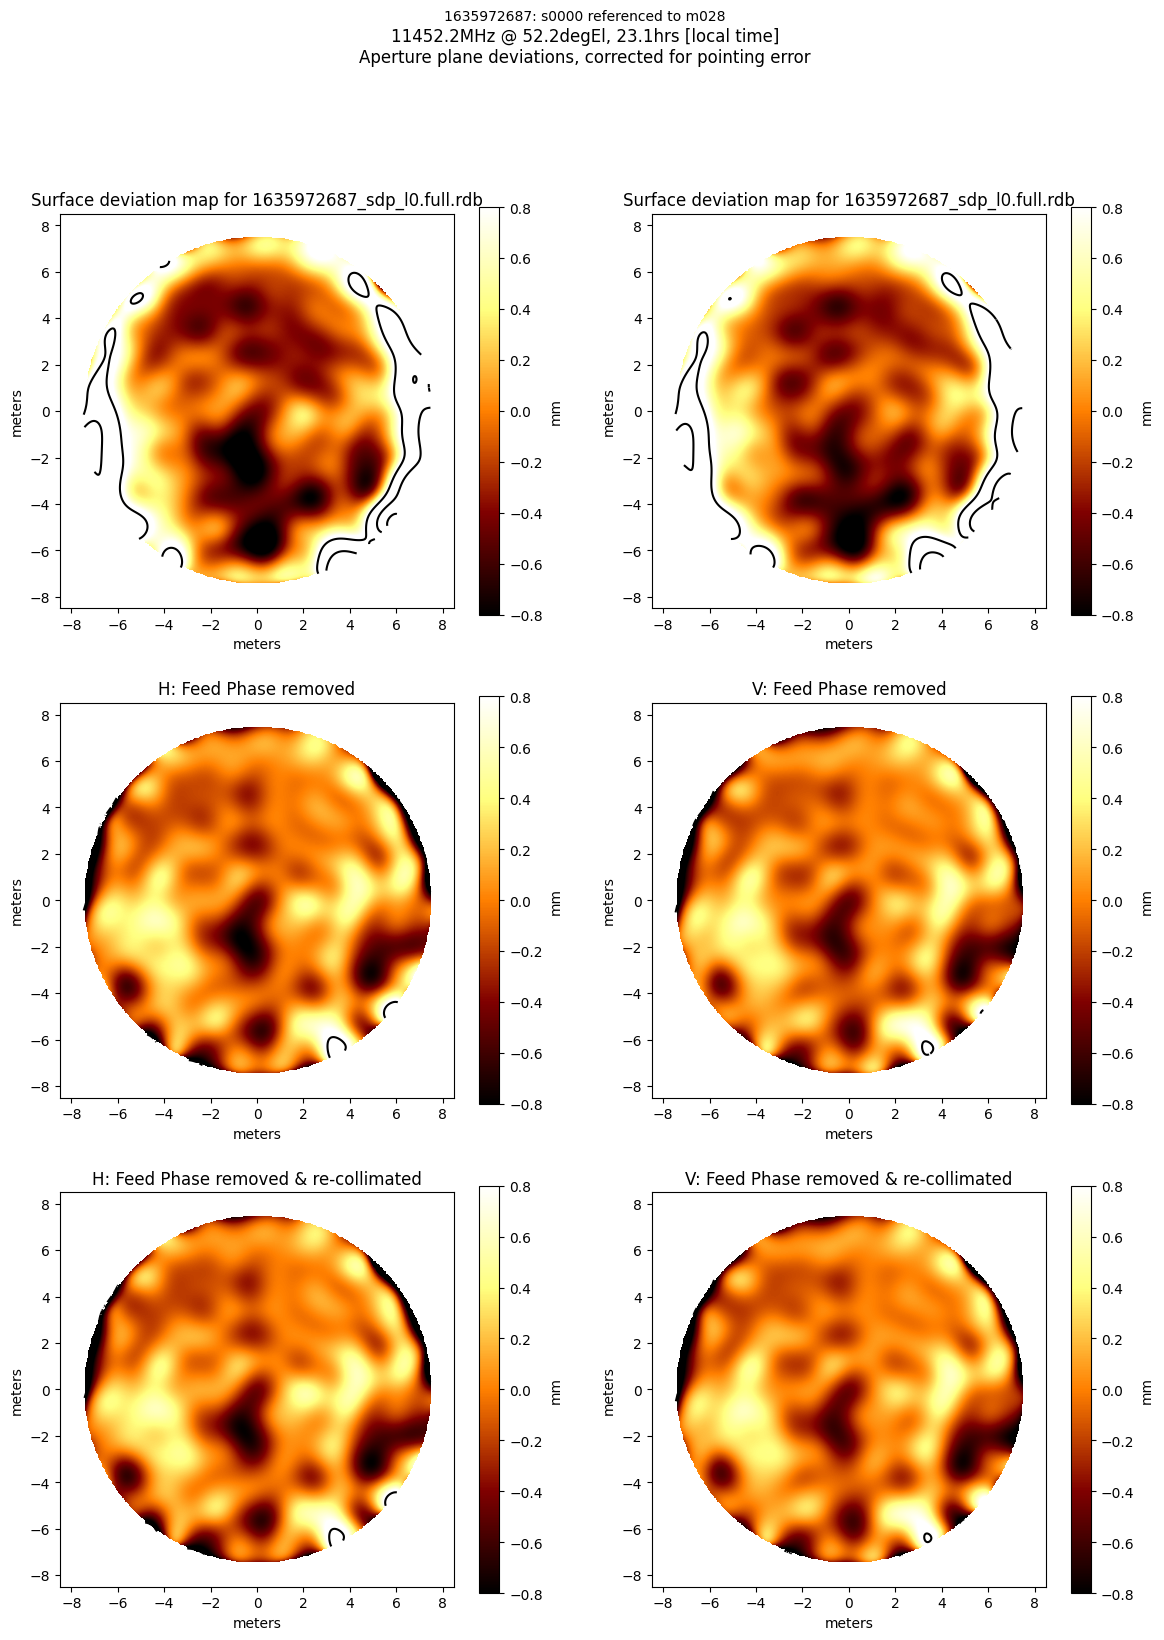

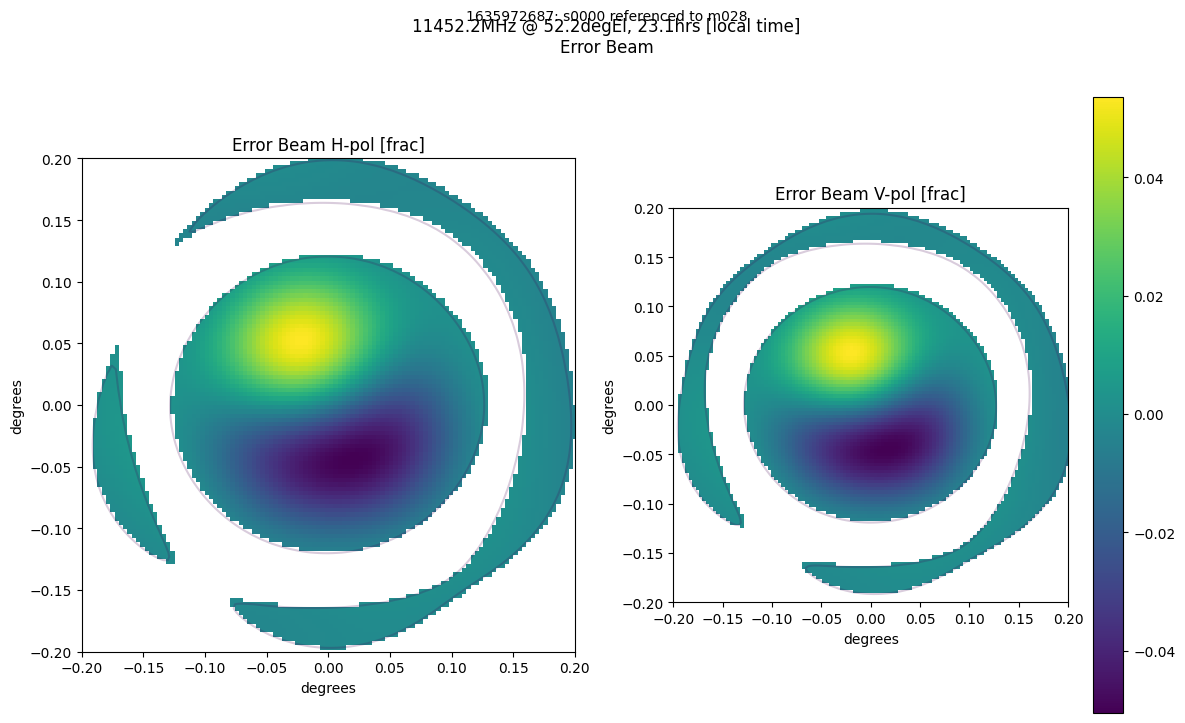

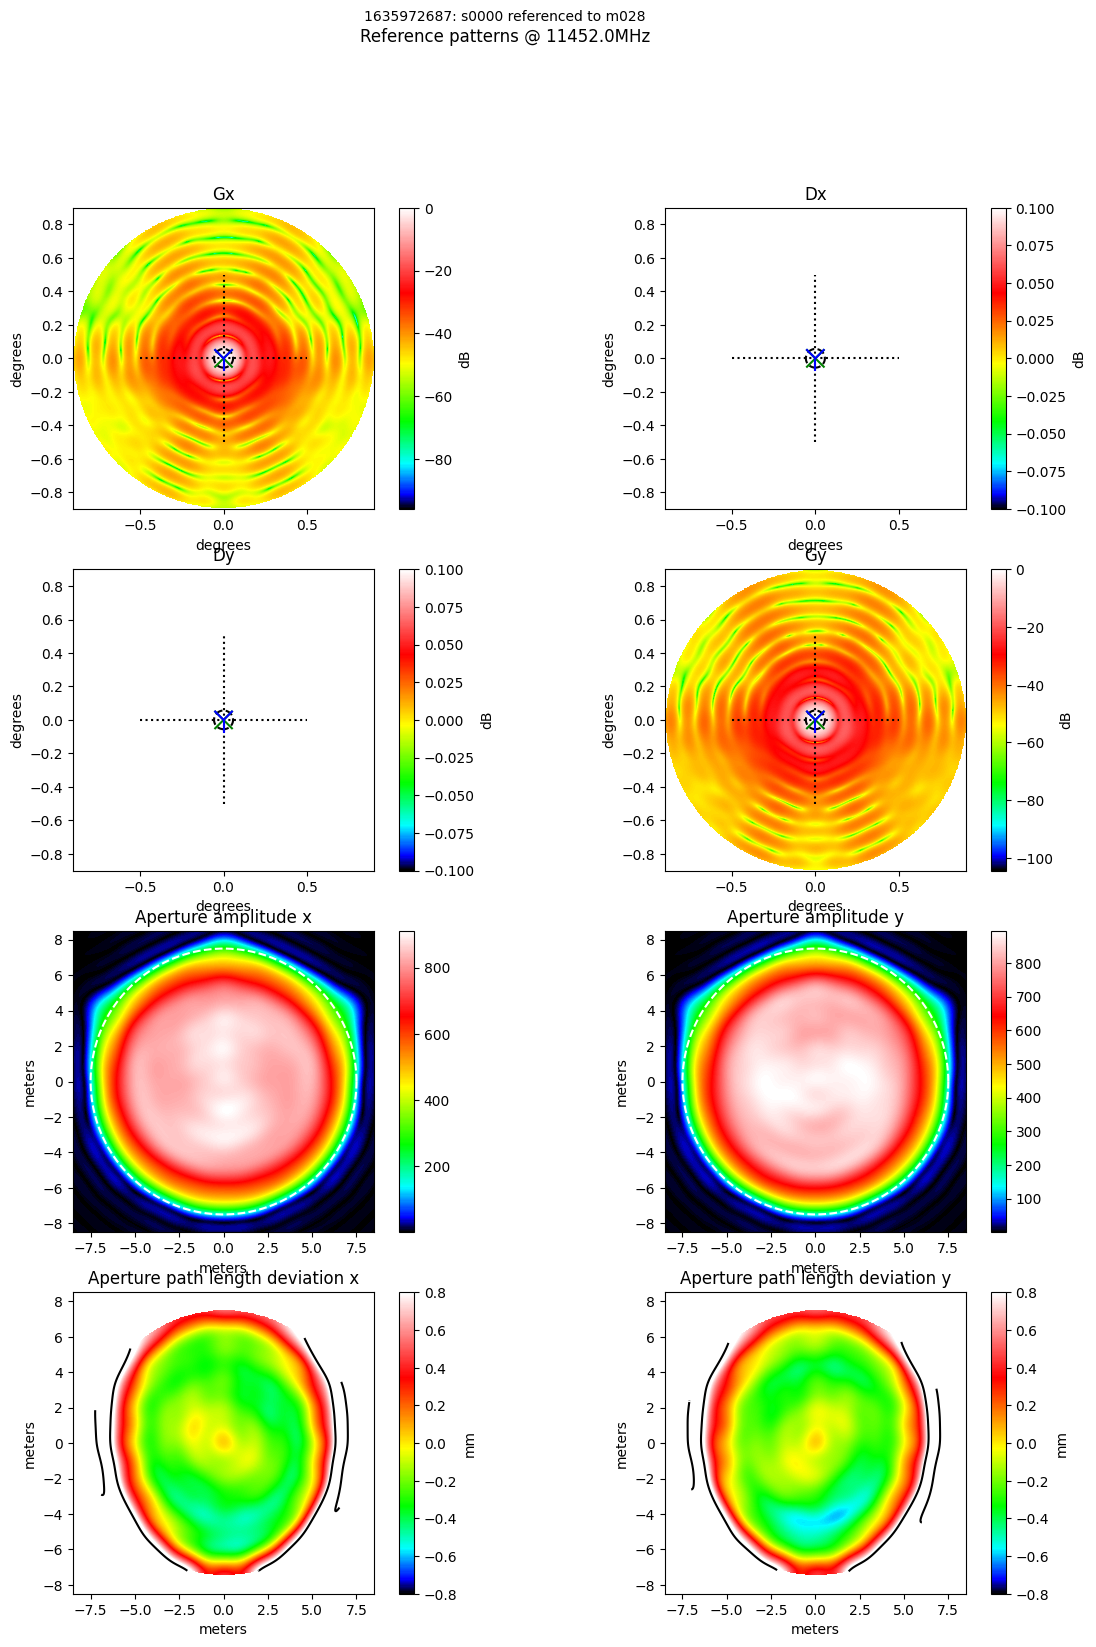

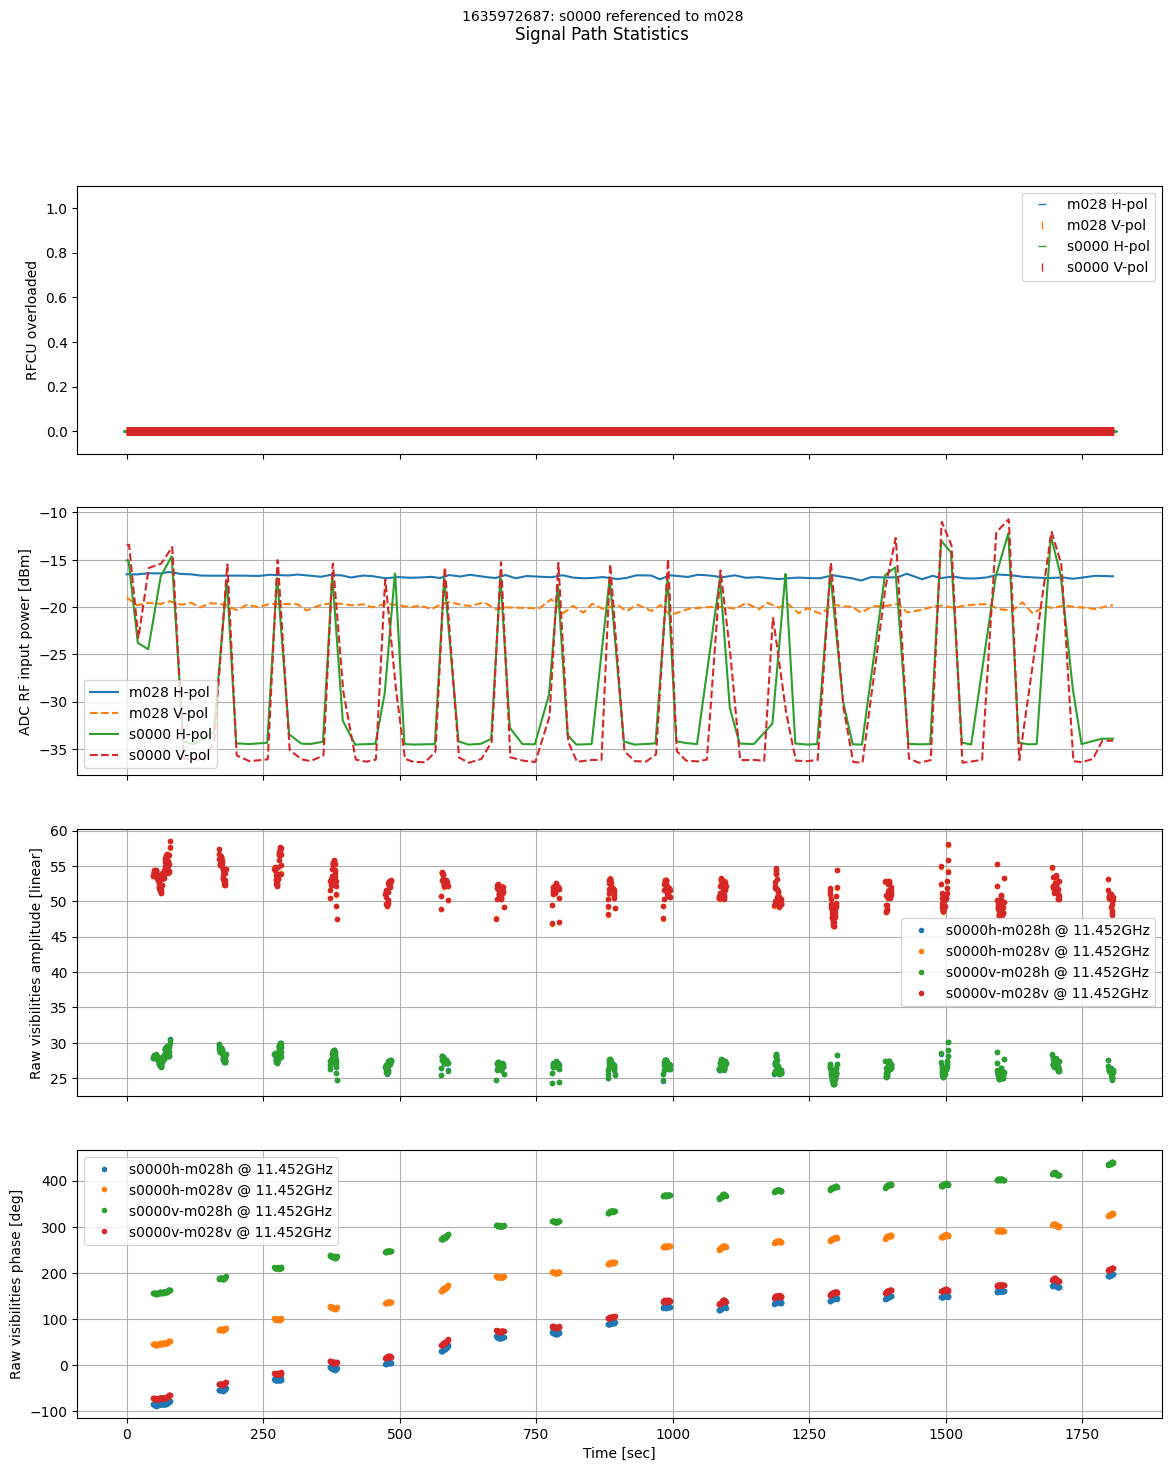

In [11]:
# A "sequential(2)" i.e. monotonic in lightness but with a kink around mid-range for emphasis.
# This seems more appropriate for showing 'devmaps' than the default offered by katholog.
CM = cm.afmhot

hologreport.generate_results(ms_RCP, pred, beampolydegree=28, beamsmoothing="zernike", SNR_min=30, cmap=CM, makepdfs=True);

### List of observations + info

In [12]:
katselib.ls_archive("Antennas:s0000 AND InstructionSet:*holography_scan* AND Description:Ku AND ExperimentID:[20211103 TO 20211104]",min_duration=1000,
                    fields=['CaptureBlockId','StartTime','Description','Targets','InstructionSet'], field_len=130);

1635913228 	2021-11-03T04:20:27Z 	SDQM: Ku-band Holography 	['azimuthunwrap', 'INTELSAT NEW DAWN'] 	/home/kat/katsdpscripts/observation/holography_scan.py --prepopulatetime 30 --scan-ants s0000 --kind radial --scan-extent 1.8 --sc
1635924315 	2021-11-03T07:25:15Z 	SDQM: Ku-band Holography 	['INTELSAT NEW DAWN', 'azimuthunwrap'] 	/home/kat/katsdpscripts/observation/holography_scan.py --prepopulatetime 30 --scan-ants s0000 --kind radial --scan-extent 1.8 --sc
1635955590 	2021-11-03T16:06:29Z 	SDQM: Ku-band Holography 	['INTELSAT NEW DAWN', 'azimuthunwrap'] 	/home/kat/katsdpscripts/observation/holography_scan.py --prepopulatetime 30 --scan-ants s0000 --kind radial --scan-extent 1.8 --sc
1635972687 	2021-11-03T20:51:26Z 	SDQM: Ku-band Holography 	['azimuthunwrap', 'INTELSAT NEW DAWN'] 	/home/kat/katsdpscripts/observation/holography_scan.py --prepopulatetime 30 --scan-ants s0000 --kind radial --scan-extent 1.8 --sc
1635974516 	2021-11-03T21:21:55Z 	SDQM: Ku-band Holography  - Spiral 	['INTE